In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [3]:
plt.style.use("seaborn")

In [4]:
X=pd.read_csv('./Training Data/Logistic_X_Train.csv').values
Y=pd.read_csv('./Training Data/Logistic_Y_Train.csv').values

u=np.mean(X,axis=0)
std=np.std(X,axis=0)
X=(X-u)/std

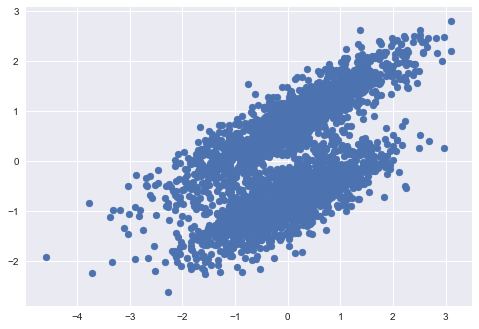

In [5]:
plt.scatter(X[:,1],X[:,0])
plt.show()

In [6]:
X.shape,Y.shape

((3000, 3), (3000, 1))

# logistic regresion code

In [7]:
def hypothesis(x,w,b):
    h=np.dot(x,w)+b
    return sigmoid(h)

def sigmoid(z):
    return 1.0/(1.0 + np.exp(-1.0*z))

def error(y_true,x,w,b):
    m=x.shape[0]
    err=0.0
    
    for i in range(m):
        hx=hypothesis(x[i],w,b)
        err +=y_true[i]*np.log2(hx) + (1-y_true[i])*np.log2(1-hx)
        
    return -err/m

def get_grad(y_true,x,w,b):
    grad_w=np.zeros(w.shape)
    grad_b= 0.0
    
    m=x.shape[0]
    
    for i in range(m):
        hx=hypothesis(x[i],w,b)
        
        grad_w+=(y_true[i]-hx)*x[i]
        
        grad_b+=(y_true[i]-hx)
        
    grad_w/=m
    grad_b/=m
    
    return [grad_w,grad_b]

def grad_descent(x,y_true,w,b,learning_rate=0.1):
    
    err=error(y_true,x,w,b)
    [grad_w,grad_b]=get_grad(y_true,x,w,b)
    
    w = w + learning_rate*grad_w
    b = b + learning_rate*grad_b
    
    return err,w,b

def predict(x,w,b):
    
    confidance = hypothesis(x,w,b)
    if confidance<0.5:
        return 0
    else:
        return 1

def get_output(x_test,w,b):
    
    y_pred=[]
    
    m=x_test.shape[0]
    
    for i in range(m):
        p=predict(x_test[i],w,b)
        y_pred.append(p)
    
    y_pred=np.array(y_pred)
    
    return y_pred

In [8]:
loss=[]


w=2*np.random.random((3,))
b=5*np.random.random()

In [9]:
for i in range(1000):
    l,w,b=grad_descent(X,Y,w,b,learning_rate=0.1)
    loss.append(l)
    

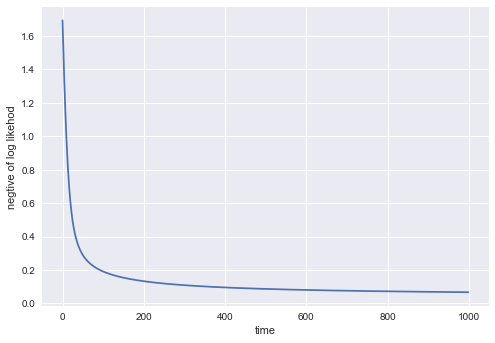

In [10]:
plt.plot(loss)
plt.ylabel("negtive of log likehod")
plt.xlabel("time")
plt.show()

In [11]:
print(w)
print(b)

[-3.216904    1.89202068 -2.58546363]
[-0.52355472]


In [12]:
x_tst=pd.read_csv('./Test Cases/Logistic_X_Test.csv').values
print(x_tst.shape)

(1000, 3)


In [13]:
x_tst=(x_tst-u)/std

In [14]:
y_tst=get_output(x_tst,w,b)

In [15]:
print(y_tst)

[1 1 0 1 1 1 0 1 0 0 0 1 1 1 1 0 1 0 1 0 1 0 1 0 1 1 0 0 0 1 1 1 1 0 0 0 1
 0 0 0 1 0 0 0 0 1 0 0 0 1 1 1 1 1 0 0 0 1 0 0 0 1 1 0 1 1 0 0 0 0 0 1 0 1
 1 1 0 1 1 0 0 0 1 1 1 0 1 1 1 0 0 1 1 0 0 1 1 1 1 0 1 0 1 1 0 1 0 0 0 0 0
 1 0 0 0 1 0 0 0 0 0 1 0 1 0 0 0 1 1 0 1 1 1 0 0 0 0 0 1 1 1 1 0 1 0 0 1 1
 1 0 1 1 0 1 0 1 0 0 0 0 0 0 0 0 1 0 0 1 1 1 1 1 1 0 1 1 1 0 1 0 0 0 1 0 0
 1 1 1 1 1 0 0 1 0 1 0 0 0 1 1 1 1 0 0 0 1 0 0 0 0 0 0 0 0 1 1 1 0 1 0 0 1
 1 1 1 0 1 1 0 0 1 0 0 1 0 1 0 0 1 1 1 0 0 0 0 0 0 1 1 1 0 1 1 0 1 0 1 0 0
 1 1 1 0 0 1 1 1 0 1 1 1 1 1 0 1 0 0 0 0 0 1 1 0 0 0 0 0 1 0 0 1 1 0 1 0 1
 0 1 0 1 1 0 1 1 0 1 0 1 1 0 0 0 0 1 0 0 0 1 1 1 1 1 0 1 1 0 0 0 1 0 1 1 0
 0 1 1 1 0 0 0 1 1 1 0 1 1 1 1 1 0 1 0 1 0 1 1 0 1 1 0 1 1 1 0 1 1 0 1 0 0
 1 1 1 1 1 1 0 1 0 0 0 1 1 1 1 1 1 0 1 1 0 1 0 1 0 0 0 0 0 1 0 0 1 0 1 1 0
 0 0 1 1 1 0 1 0 1 0 1 1 0 1 1 1 0 0 0 1 1 0 1 1 0 1 1 1 0 0 0 1 1 1 0 1 0
 0 0 1 0 0 0 0 1 1 0 1 0 1 1 0 0 1 1 1 1 0 1 1 0 1 1 1 1 1 1 1 1 0 1 0 1 0
 0 1 0 1 0 1 0 0 0 0 0 0 

In [16]:
y_tst.shape

(1000,)

In [17]:
df=pd.DataFrame(data=y_tst,columns=['label'])
df.to_csv('y_prediction.csv',index=False)